# Clinical trials: Dataframe setup


In [2]:
import time
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
base_color = "#3298D0"
plot_size = (14, 10)

In [7]:
# Path for csv folder & file
path_to_csv_file = os.path.abspath('../data/csv/')

# json file
csv_file = '/clean_data'

## Import csv file

In [8]:
# Import json into a dataframe
clean_csv_file = '{}{}.csv'.format(path_to_csv_file, csv_file)

In [9]:
# breaks with large json file
df = pd.read_csv(clean_csv_file)

In [11]:
df.head()

,Unnamed: 0,id,original_date,source,brief_title,condition,full_description,summary,full_date,year
0,46038,NCT00004640,"September 17, 1999",University of Washington,"""Clinical Trials to Enhance Elders' Oral Healt...",Tooth Loss,"""TEETH"" is a double-blinded, randomized...",The purpose of this study is to determi...,1999-09-17,1999
1,150757,NCT00004639,"September 17, 1999",University of Florida,Cleft Palate Surgery and Speech Development,Cleft Lip,This study is conducted with patients w...,Compare the outcome of two primary surg...,1999-09-17,1999
2,43264,NCT00000341,"September 20, 1999",National Institute on Drug Abuse (NIDA),Evaluation of Liquid vs. Tablet Buprenorphine - 6,Opioid-Related Disorders,None,The purpose of this study is to evaluat...,1999-09-20,1999
3,195656,NCT00000289,"September 20, 1999",National Institute on Drug Abuse (NIDA),Role of Metabolites in Nicotine Dependence (3)...,Tobacco Use Disorder,Previous studies have shown that cotini...,The purpose of this study is to determi...,1999-09-20,1999
4,528,NCT00000227,"September 20, 1999",University of Vermont,Alternate-Day Buprenorphine Administration. Ph...,Opioid-Related Disorders,None,The purpose of this study is to evaluat...,1999-09-20,1999


## Explore dataset

In [63]:
pd.options.display.max_colwidth = 5000
df[0:1]

,summary,title,condition,full_description,id,source,date,full_date,year
46038,"The purpose of this study is to determine if regular rinsing with chlorhexidine is effective as a long-term preventive method for reducing the incidence of tooth loss in low income older adults. The true end-point of the study is tooth loss after five years of regular rinsing with chlorhexidine or a placebo; surrogate endpoints are periodontal disease, root and coronal decay.","""Clinical Trials to Enhance Elders' Oral Health"" (""TEETH"")",Tooth Loss,"""TEETH"" is a double-blinded, randomized clinical trial, supervised by a Data & Safety Monitoring Board, designed to provide unequivocal evidence regarding the impact of regular rinsing 0.12% chlorhexidine solution on tooth loss in low income, community-dwelling older adults who are irregular users of dental services. Of the 1101 subjects enrolled in the study in Seattle, WA and Vancouver, B.C., one/half have been assigned to the active rinse condition; the other half to the placebo rinse which looks and tastes like the chlorhexidine rinse but does not have the active ingredient. Subjects receive two bottles of rinse every six months; the first to be used daily for one month, the second weekly for five months. Reminder calls are designed to help subjects maintain this rinse regimen. Subjects return yearly to research clinics at each participating university, where they are examined by a dentist who is trained in clinical research methodology and calibrated annually. The purpose of these visits is to examine subjects for tooth loss (followed by contacts with extracting dentists to determine the dentist's reasons for extracting the tooth), pocket depth, recession, caries and restorations on root and coronal surfaces. Interviews are also conducted annually with participants to assess health status, health behaviors, and oral health quality of life. A panoramic radiograph was taken at baseline of each subject and is to be done again at the five-year (final) yearly exam. These radiographs are used to confirm tooth loss and possible reasons for extractions",NCT00004640,University of Washington,"September 17, 1999",1999-09-17,1999


## Check unique values

In [64]:
# Unique conditions
print('Number of conditions in data: {}'.format(df['condition'].nunique()))

Number of conditions in data: 47596


In [66]:
# Unique source
print('Number of sources: {}'.format(df['source'].nunique()))

Number of sources: 18304


## Number of trials per year

In [25]:
# Number of trials by year
trials_by_year = df.groupby('year')['id'].count()

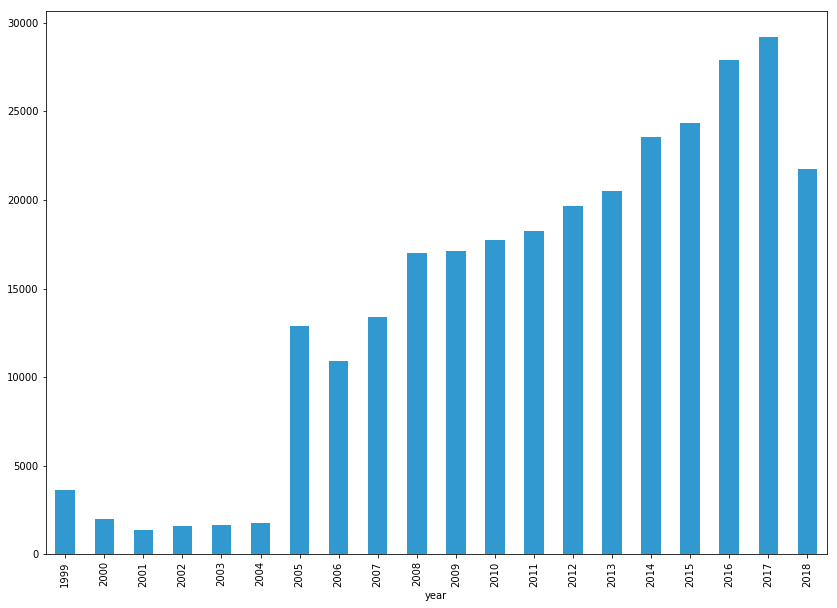

In [26]:
trials_by_year.plot.bar(color = base_color, figsize=plot_size)
plt.show()

In [27]:
df_1999 = df[df['year'] == 1999]

In [28]:
df_1999.head()

,id,original_date,source,brief_title,condition,full_description,summary,full_date,year
46038,NCT00004640,"September 17, 1999",University of Washington,"""Clinical Trials to Enhance Elders' Oral Healt...",Tooth Loss,"""TEETH"" is a double-blinded, randomized...",The purpose of this study is to determi...,1999-09-17,1999
150757,NCT00004639,"September 17, 1999",University of Florida,Cleft Palate Surgery and Speech Development,Cleft Lip,This study is conducted with patients w...,Compare the outcome of two primary surg...,1999-09-17,1999
43264,NCT00000341,"September 20, 1999",National Institute on Drug Abuse (NIDA),Evaluation of Liquid vs. Tablet Buprenorphine - 6,Opioid-Related Disorders,None,The purpose of this study is to evaluat...,1999-09-20,1999
195656,NCT00000289,"September 20, 1999",National Institute on Drug Abuse (NIDA),Role of Metabolites in Nicotine Dependence (3)...,Tobacco Use Disorder,Previous studies have shown that cotini...,The purpose of this study is to determi...,1999-09-20,1999
528,NCT00000227,"September 20, 1999",University of Vermont,Alternate-Day Buprenorphine Administration. Ph...,Opioid-Related Disorders,None,The purpose of this study is to evaluat...,1999-09-20,1999


## Find clusters in data